In [1]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [2]:
import pandas as pd
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [104]:
x=df.iloc[:,4].values
y=df.iloc[:,11].values

In [105]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x,y=oversample.fit_resample(x.reshape(-1,1),y)

In [106]:
x.shape

(9722, 1)

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [108]:
#Decision tree
from sklearn import tree
classifier=tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [109]:
pred=classifier.predict(x_test)

In [110]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5778920308483291

In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[929,  44],
       [777, 195]])

In [112]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.54      0.95      0.69       973
           1       0.82      0.20      0.32       972

    accuracy                           0.58      1945
   macro avg       0.68      0.58      0.51      1945
weighted avg       0.68      0.58      0.51      1945



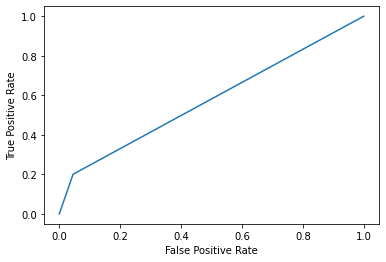

In [113]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

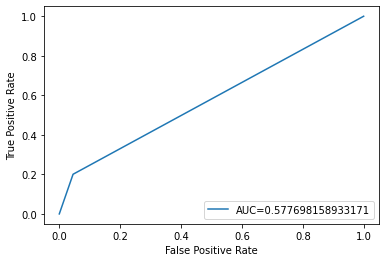

In [114]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

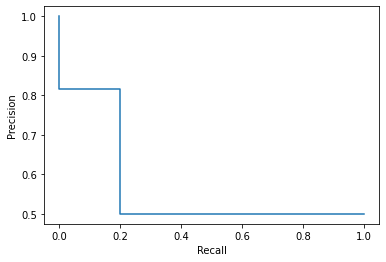

In [115]:
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [116]:
#knn
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [117]:
pred=classifier.predict(x_test)

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5778920308483291

In [119]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[929,  44],
       [777, 195]])

In [120]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.54      0.95      0.69       973
           1       0.82      0.20      0.32       972

    accuracy                           0.58      1945
   macro avg       0.68      0.58      0.51      1945
weighted avg       0.68      0.58      0.51      1945



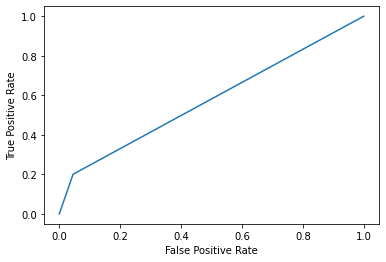

In [121]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

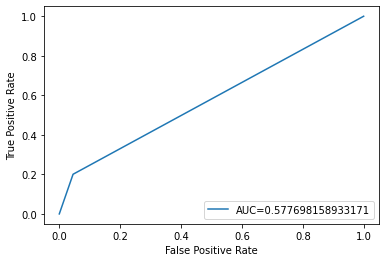

In [122]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

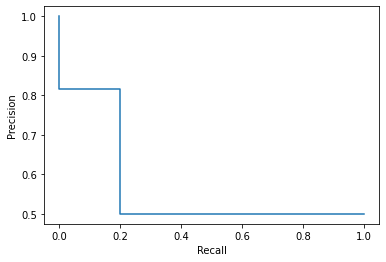

In [123]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [124]:
#svm
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)

SVC()

In [125]:
pred=classifier.predict(x_test)

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5778920308483291

In [127]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[929,  44],
       [777, 195]])

In [128]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.54      0.95      0.69       973
           1       0.82      0.20      0.32       972

    accuracy                           0.58      1945
   macro avg       0.68      0.58      0.51      1945
weighted avg       0.68      0.58      0.51      1945



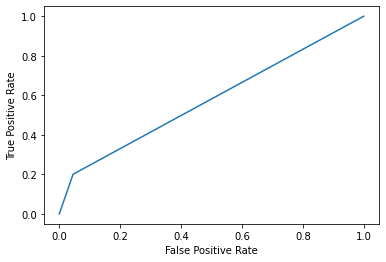

In [129]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

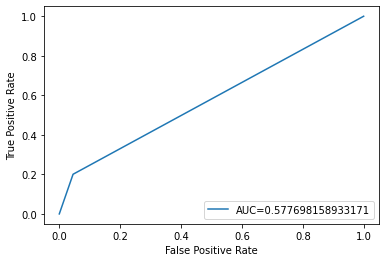

In [130]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

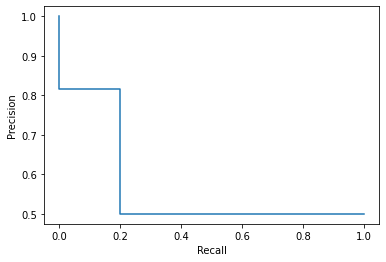

In [131]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [132]:
#random forest
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [133]:
pred=classifier.predict(x_test)

In [134]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5778920308483291

In [135]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[929,  44],
       [777, 195]])

In [136]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.54      0.95      0.69       973
           1       0.82      0.20      0.32       972

    accuracy                           0.58      1945
   macro avg       0.68      0.58      0.51      1945
weighted avg       0.68      0.58      0.51      1945



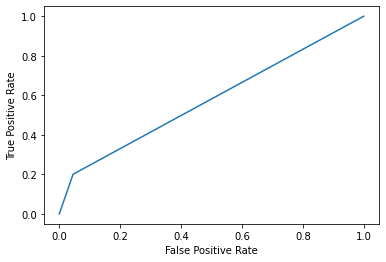

In [137]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

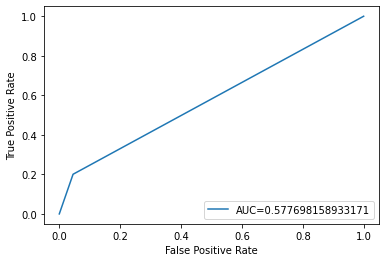

In [138]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

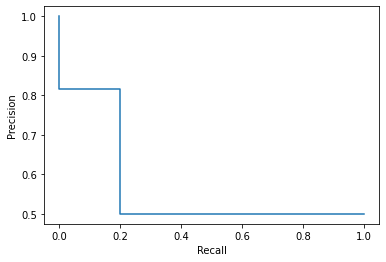

In [139]:

precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [140]:
#logistic regression
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression()  
classifier.fit(x_train, y_train)  

LogisticRegression()

In [141]:
pred=classifier.predict(x_test)

In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5778920308483291

In [143]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[929,  44],
       [777, 195]])

In [144]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.54      0.95      0.69       973
           1       0.82      0.20      0.32       972

    accuracy                           0.58      1945
   macro avg       0.68      0.58      0.51      1945
weighted avg       0.68      0.58      0.51      1945



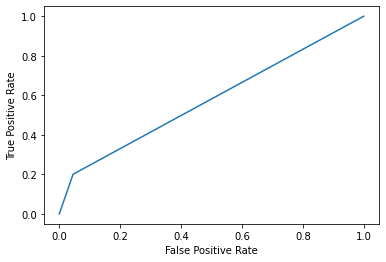

In [145]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

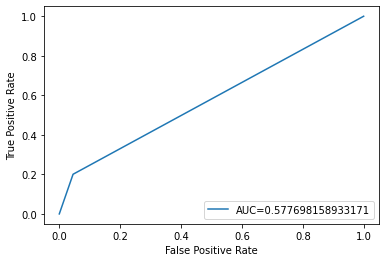

In [146]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

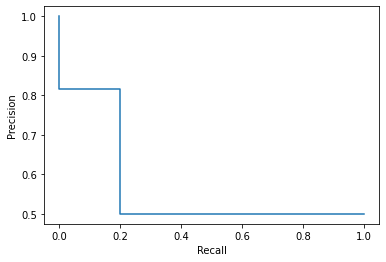

In [147]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [148]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [149]:
pred=classifier.predict(x_test)

In [150]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5778920308483291

In [151]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[929,  44],
       [777, 195]])

In [152]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.54      0.95      0.69       973
           1       0.82      0.20      0.32       972

    accuracy                           0.58      1945
   macro avg       0.68      0.58      0.51      1945
weighted avg       0.68      0.58      0.51      1945



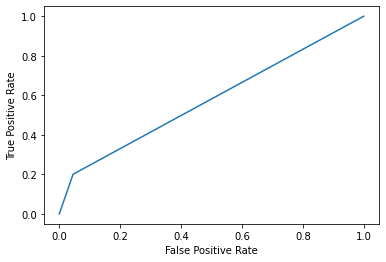

In [153]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

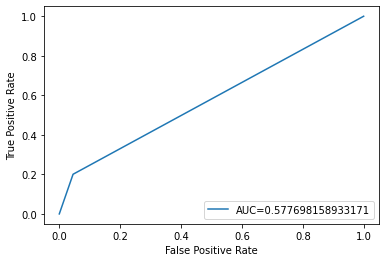

In [154]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

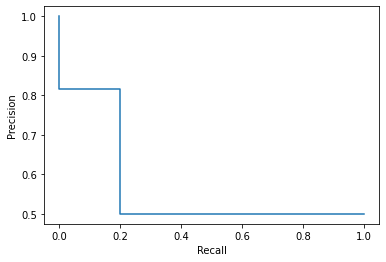

In [155]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [156]:
pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [157]:
#fuzzy
from fcmeans import FCM
classifier = FCM(n_clusters=2)
classifier.fit(x)

In [158]:
pred=classifier.predict(x_test)

In [159]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.4221079691516709

In [160]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[ 44, 929],
       [195, 777]])

In [161]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.18      0.05      0.07       973
           1       0.46      0.80      0.58       972

    accuracy                           0.42      1945
   macro avg       0.32      0.42      0.33      1945
weighted avg       0.32      0.42      0.33      1945



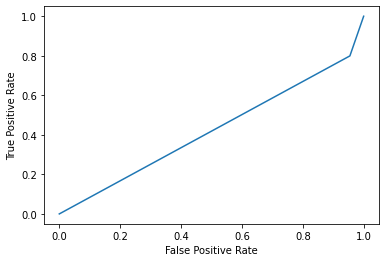

In [162]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

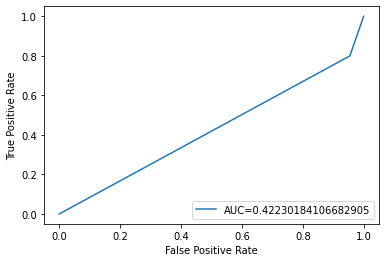

In [163]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

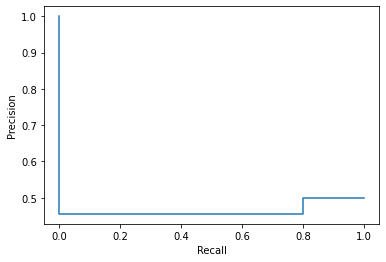

In [164]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [165]:
def new_models():
  models = dict()
  models['lr'] = LogisticRegression()
  models['knn'] = KNeighborsClassifier()
  models['dt'] = tree.DecisionTreeClassifier()
  models['svm'] = SVC()
  models['bayes'] = GaussianNB()
  models['rf']=RandomForestClassifier()
  models['stacking'] = new_stacking()
  return models

In [166]:
from sklearn.ensemble import StackingClassifier
def new_stacking():
  level0 = list()
  level0.append(('lr', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('dt', tree.DecisionTreeClassifier()))
  level0.append(('svm', SVC()))
  level0.append(('bayes', GaussianNB()))
  level0.append(('rf',RandomForestClassifier() ))
  level1 = LogisticRegression()
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=6)
  return model

In [167]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
def eval_model(model):
  cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=4, random_state=2)
  scr = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-2, error_score='raise')
  return scr

>lr 0.5721 (0.0130)
>knn 0.5000 (0.0003)
>dt 0.5721 (0.0130)
>svm 0.5721 (0.0130)
>bayes 0.5721 (0.0130)
>rf 0.5721 (0.0130)
>stacking 0.5721 (0.0130)


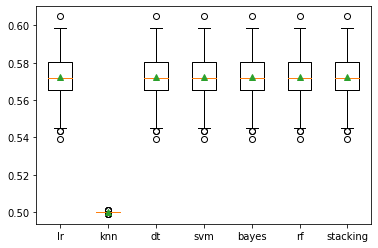

In [168]:
from numpy import mean
from numpy import std
X=x
Y=y
models = new_models()
results, names = list(), list()
for name, model in models.items():
  scr = eval_model(model)
  results.append(scr)
  names.append(name)
  print('>%s %.4f (%.4f)' % (name, mean(scr), std(scr)))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [169]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [170]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [171]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [172]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [173]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [174]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
244/244 [==============================] - 2s 2ms/step - loss: 0.7031 - accuracy: 0.4288
Epoch 2/50
244/244 [==============================] - 1s 3ms/step - loss: 0.6938 - accuracy: 0.4711
Epoch 3/50
244/244 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4989
Epoch 4/50
244/244 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4886
Epoch 5/50
244/244 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5011
Epoch 6/50
244/244 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5001
Epoch 7/50
244/244 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5001
Epoch 8/50
244/244 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4967
Epoch 9/50
244/244 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4958
Epoch 10/50
244/244 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4968

In [175]:
y_pred = ann.predict(x_test)

61/61 [==============================] - 0s 1ms/step


In [176]:
y_pred = (y_pred > 0.5)

In [177]:
import numpy as np
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 0]
 [1 0]]


In [178]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)


array([[  0, 973],
       [  0, 972]])

In [179]:
accuracy_score(y_test, y_pred)

0.4997429305912596

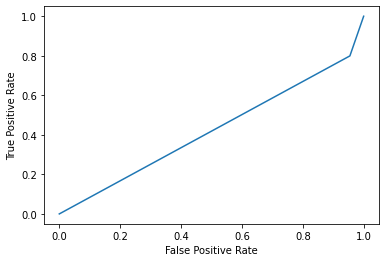

In [180]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

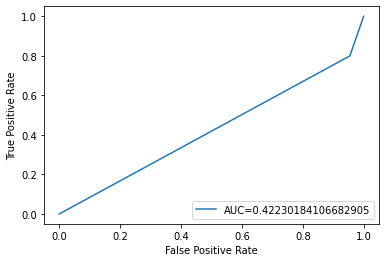

In [181]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

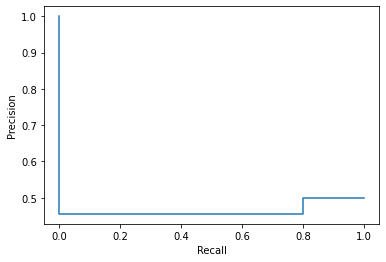

In [182]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()